**Object Detection with OpenCV and EfficientDet**

# Download the Files

We will first download the files needed for running Object Detection with EfficientDet models. We will download the following files and save it in the model_data directory.
1. Weights file (.pb)
2. Configuration file (.pbtxt)
3. Name files (.txt)

In [47]:
# Download weights
!wget -q https://www.dropbox.com/s/9mqp99fd2tpuqn6/efficientdet-d0.pb?dl=1 -O model_data/efficientdet-d0.pb

In [65]:
#Download names or label file
!wget -q https://raw.githubusercontent.com/amikelive/coco-labels/master/coco-labels-paper.txt -O model_data/coco-labels-paper.txt

In [49]:
#Download the configuration file
!wget -q https://raw.githubusercontent.com/opencv/opencv_extra/master/testdata/dnn/efficientdet-d0.pbtxt -O model_data/efficientdet-d0.pbtxt

# Import Necessary Libraries

In [20]:
import numpy as np
import cv2 as cv2
print(cv.__file__)
print(cv.__version__)
import time

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

#Routine to fix colors in image
def fixColor(image):
    return(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

/usr/local/anaconda/envs/tensorflow2/lib/python3.6/site-packages/cv2/cv2.cpython-36m-x86_64-linux-gnu.so
4.5.1


# Read the labels file

In [11]:
labelsFile="model_data/coco-labels-paper.txt"
LABELS = open(labelsFile).read().strip().split("\n")
print ("No. of supported classes", len(LABELS))

No. of supported classes 91


Create a array COLORS populated with different colors for different classes

In [12]:
np.random.seed(42)
COLORS = np.random.randint(0, 255, size=(len(LABELS), 3), dtype="uint8")

# Read the image

We read the image. 

608 608


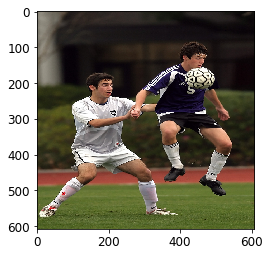

In [24]:
img=cv2.imread("images/soccer.jpg")
img=cv2.resize(img, (608, 608))
plt.imshow(fixColor(img))
(H, W) = img.shape[:2]
print (H, W)

The final blob image has to be a 512x512 to be processed. We also normalise all pixel values by dividing by 255. OpenCV by default uses BGR format. We swap it to RGB using the swapRB=True flag.

In [25]:
inp = cv2.dnn.blobFromImage(img, 1 / 255.0, (512, 512), swapRB=True, crop=False)

# Model
The model is read by using the OpenCVs DNN module. It takes the config file and the weights to load the model

In [15]:
net = cv.dnn.readNet('model_data/efficientdet-d0.pb', 'model_data/efficientdet-d0.pbtxt')

Here the blob is set as input the net and we do a forward pass. We also measure the time taken for the pass

In [17]:

net.setInput(inp)
t0 = time.time()
boxes = net.forward()
t = time.time()
print('time=', t-t0)
print(boxes.shape)

time= 0.3522500991821289
(1, 1, 100, 7)


There will be 100 detections. The detection will include the classID, confidence and parameters of the box.

- ClassID
- Probability or Confidence
- Normalized min_x
- Normalized min_y
- Normalized max_x
- Normalised max_y

# Creating the output image
We iterate through all the predictions. If the confidence is greater than the threshold the we calculate the coordinates of the box. We use OpenCV to create rectangle and write the class and confidence in the box. The color is unique for each class.

In [18]:
for i in range(0, boxes.shape[2]):
    classID = int(boxes[0, 0, i, 1]) #ClassID
    confidence = boxes[0, 0, i, 2]  #Confidence
    #print ("Confidence", confidence)
    if confidence > 0.3: #Set a threshold beyond which you want detections        
        #Box coordinates are normalised. Multiply with actual rows and columns to get
        #actual dimensions
        
        min_x=int(boxes[0, 0, i, 3]*W)
        min_y=int(boxes[0, 0, i,4]*H)
        max_x=int(boxes[0, 0, i,5]*W)
        max_y=int(boxes[0, 0, i,6]*H)
        #Integer the colors
        color = COLORS[classID]
        color = [int(c) for c in color]
        
        #Make rectangle for the box
        cv2.rectangle(img, (min_x, min_y), (max_x, max_y), color, 6)
        #Text to display includes the Label and confidence
        text = "{}: {:.2f}".format(LABELS[classID], confidence)
        cv2.putText(img, text, (min_x, min_y - 10),
				cv2.FONT_HERSHEY_SIMPLEX, 1, color, 3)

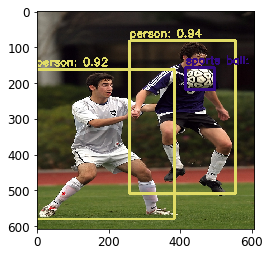

In [21]:
plt.imshow(fixColor(img))